In [ ]:
import pandas as pd

# Load data
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Quick overview
matches.head()
matches.info()
matches.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
matches.dropna(subset=['winner'], inplace=True)


In [ ]:
captain_wins = matches['player_of_match'].value_counts().head(10)


In [ ]:
batting_second_wins = matches[matches['result'] == 'wickets']['winner'].value_counts()

In [ ]:
matches['toss_match_win'] = matches['toss_winner'] == matches['winner']
impact = matches['toss_match_win'].value_counts(normalize=True) * 100


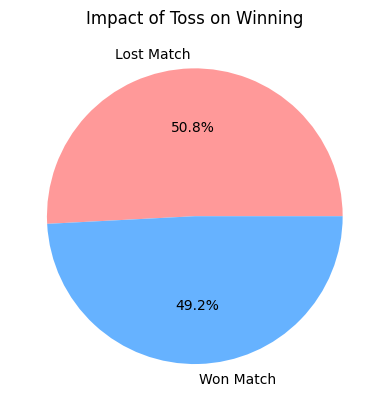

In [ ]:
import matplotlib.pyplot as plt

impact.plot.pie(autopct='%1.1f%%', labels=['Lost Match', 'Won Match'], colors=['#FF9999','#66B2FF'])
plt.title("Impact of Toss on Winning")
plt.ylabel("")
plt.show()


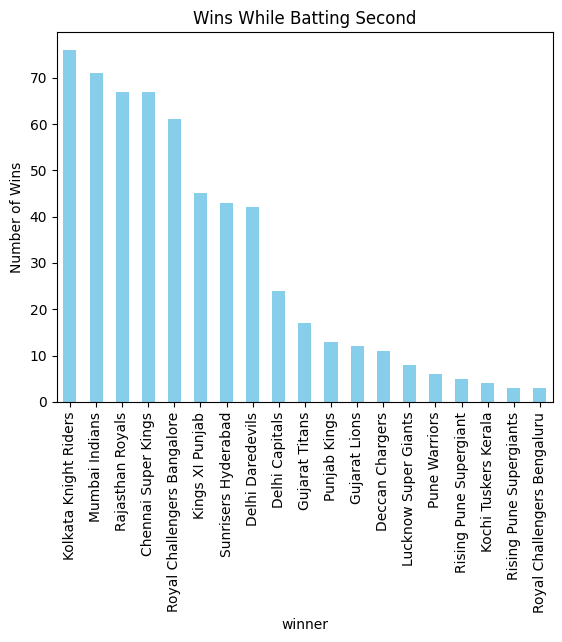

In [ ]:
batting_second_wins.plot(kind='bar', color='skyblue')
plt.title("Wins While Batting Second")
plt.ylabel("Number of Wins")
plt.show()


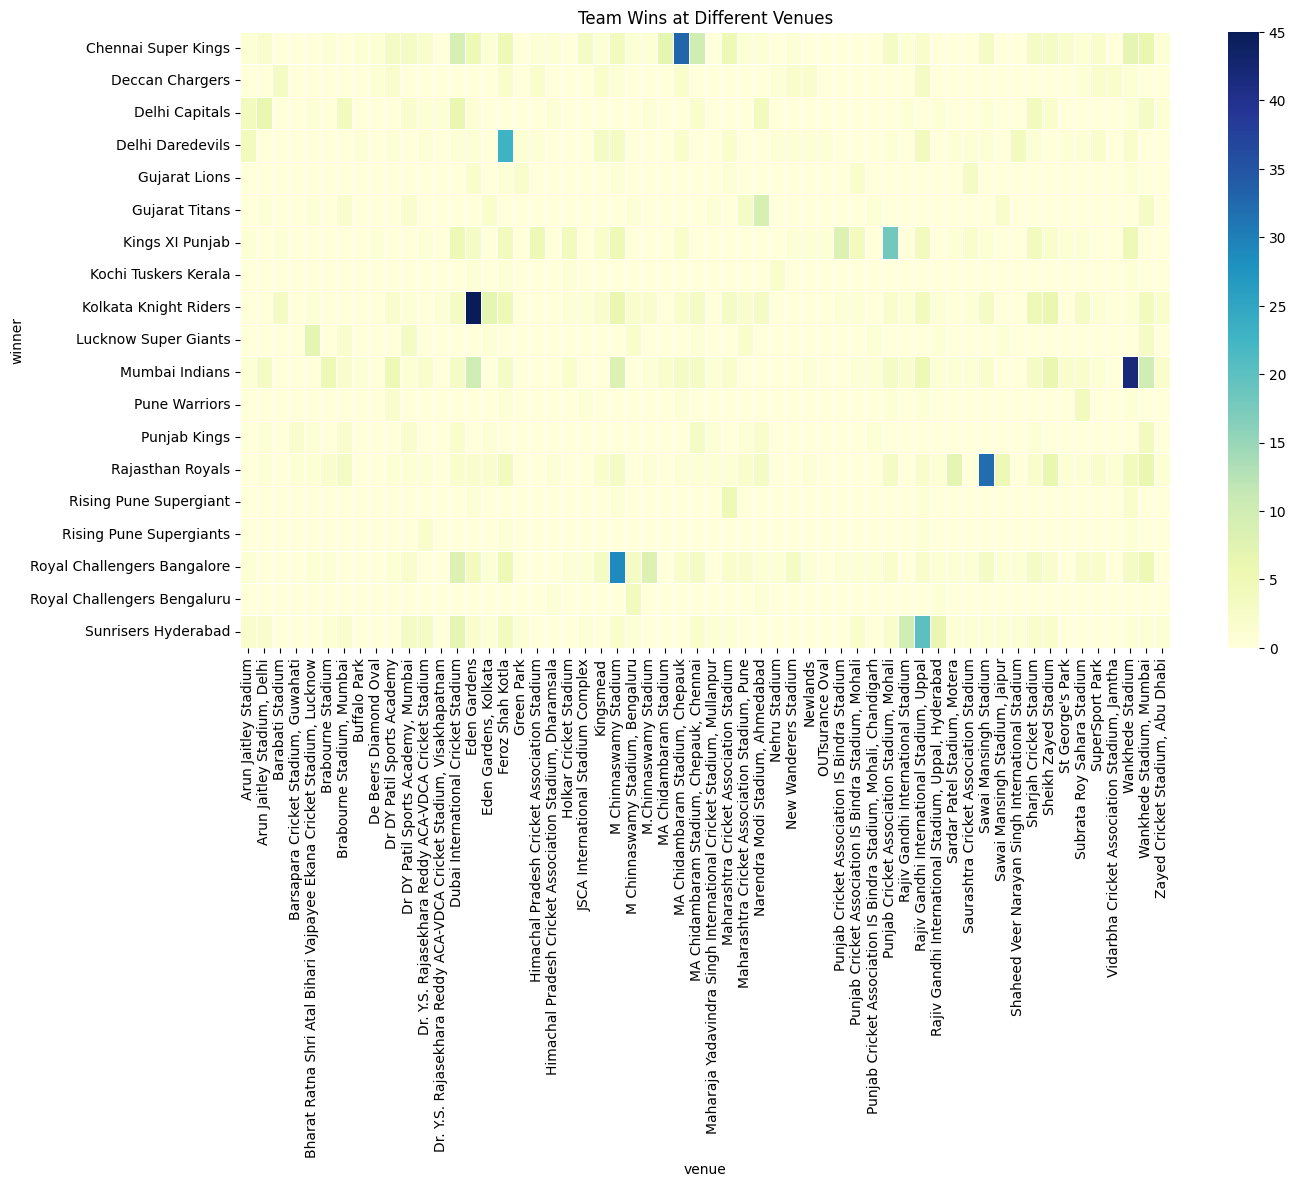

In [ ]:
import seaborn as sns

team_venue = pd.crosstab(matches['winner'], matches['venue'])
plt.figure(figsize=(15,8))
sns.heatmap(team_venue, cmap='YlGnBu', linewidths=.5)
plt.title("Team Wins at Different Venues")
plt.show()
